<a href="https://colab.research.google.com/github/Safhanafarha775/pandas-data-cleaning-visualization/blob/main/DS_Project_Advanced_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDAS

In [59]:
import pandas as pd

In [60]:
data={"Name":["Safhana","Arham","Kamil","Sathya","Swetha","Wahaj Ali"],"Age":[25,30,28,16,49,39],"City":["India","UAE","Qatar","Indonesia","Lakshadweep","Pakistan"]}

In [61]:
df1=pd.DataFrame(data)
print(df)

        Name  Age         City  Salary
0    Safhana   25        India   45000
1      Arham   30          UAE   67000
2      Kamil   28        Qatar   32000
3     Sathya   16    Indonesia   15000
4     Swetha   49  Lakshadweep   50000
5  Wahaj Ali   39     Pakistan  120000


In [62]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Age     6 non-null      int64 
 2   City    6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes
None


In [63]:
print(df1.describe())

             Age
count   6.000000
mean   31.166667
std    11.478966
min    16.000000
25%    25.750000
50%    29.000000
75%    36.750000
max    49.000000


In [64]:
df1["Salary"]=[45000,67000,32000,15000,50000,120000]
print(df)

        Name  Age         City  Salary
0    Safhana   25        India   45000
1      Arham   30          UAE   67000
2      Kamil   28        Qatar   32000
3     Sathya   16    Indonesia   15000
4     Swetha   49  Lakshadweep   50000
5  Wahaj Ali   39     Pakistan  120000


In [65]:
df2=pd.DataFrame({"Name":["Safhana","Arham","Kamil","Sathya","Swetha","Wahaj Ali"], "Department":['IT','IT','HR','HR','HR','IT']})
print(df2)

        Name Department
0    Safhana         IT
1      Arham         IT
2      Kamil         HR
3     Sathya         HR
4     Swetha         HR
5  Wahaj Ali         IT


In [66]:
df = pd.merge(df, df2, on="Name")
print(df)

        Name  Age         City  Salary Department
0    Safhana   25        India   45000         IT
1      Arham   30          UAE   67000         IT
2      Kamil   28        Qatar   32000         HR
3     Sathya   16    Indonesia   15000         HR
4     Swetha   49  Lakshadweep   50000         HR
5  Wahaj Ali   39     Pakistan  120000         IT


In [67]:
pivot = df.pivot_table(values="Salary", index="City", aggfunc="mean")
print(pivot)

               Salary
City                 
India         45000.0
Indonesia     15000.0
Lakshadweep   50000.0
Pakistan     120000.0
Qatar         32000.0
UAE           67000.0


In [68]:
pivot = df.pivot_table(values="Salary", index="City", columns="Department", aggfunc="mean")
print(pivot)


Department        HR        IT
City                          
India            NaN   45000.0
Indonesia    15000.0       NaN
Lakshadweep  50000.0       NaN
Pakistan         NaN  120000.0
Qatar        32000.0       NaN
UAE              NaN   67000.0


In [69]:
ct = pd.crosstab(df["City"], df["Department"])
print(ct)

Department   HR  IT
City               
India         0   1
Indonesia     1   0
Lakshadweep   1   0
Pakistan      0   1
Qatar         1   0
UAE           0   1


In [70]:
df["Bonus"] = df["Salary"].apply(lambda x: x * 0.1)
print(df)

        Name  Age         City  Salary Department    Bonus
0    Safhana   25        India   45000         IT   4500.0
1      Arham   30          UAE   67000         IT   6700.0
2      Kamil   28        Qatar   32000         HR   3200.0
3     Sathya   16    Indonesia   15000         HR   1500.0
4     Swetha   49  Lakshadweep   50000         HR   5000.0
5  Wahaj Ali   39     Pakistan  120000         IT  12000.0


Visualization with Pandas

<Axes: title={'center': 'Salary Trend'}>

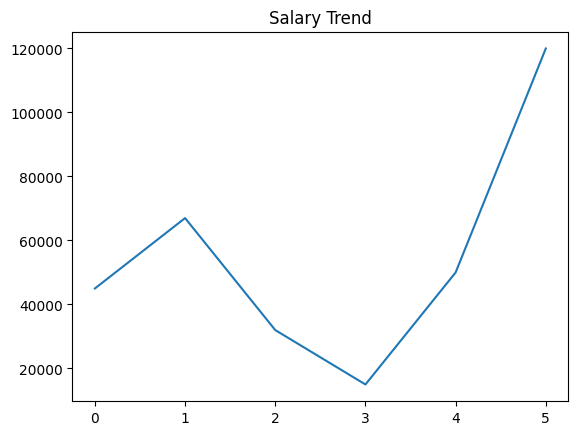

In [73]:
df["Salary"].plot(kind="line", title="Salary Trend")

<Axes: title={'center': 'Employees per Dept'}, ylabel='Department'>

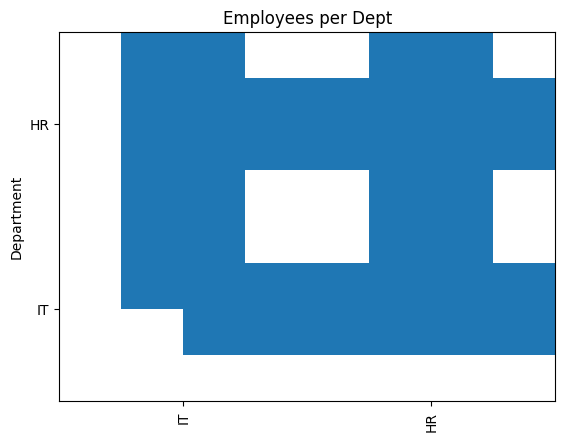

In [76]:
#Bar & Horizontal Bar Plot
df["Department"].value_counts().plot(kind="bar", title="Employees per Dept")
df["Department"].value_counts().plot(kind="barh")

<Axes: title={'center': 'Salary Distribution'}, ylabel='Frequency'>

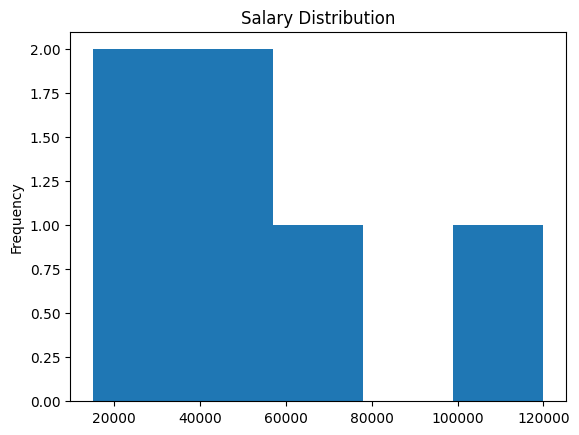

In [77]:
#Histogram
df["Salary"].plot(kind="hist", bins=5, title="Salary Distribution")

<Axes: title={'center': 'Age vs Salary'}, xlabel='City', ylabel='Salary'>

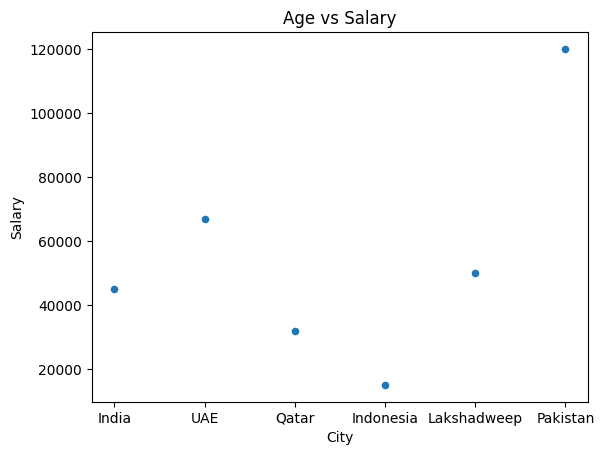

In [80]:
#Scatter Plot
df.plot(x="City", y="Salary", kind="scatter", title="Age vs Salary")

<Axes: title={'center': 'Salary'}, xlabel='Department'>

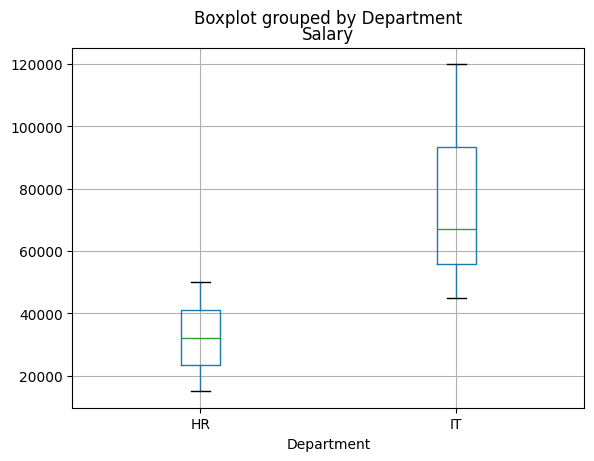

In [81]:
#BoxPlot
df.boxplot(column="Salary", by="Department")

<Axes: >

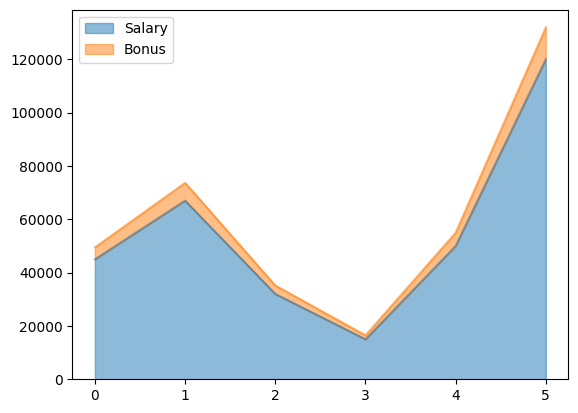

In [87]:
#Area Plot
df[["Salary","Bonus"]].plot(kind="area", alpha=0.5)

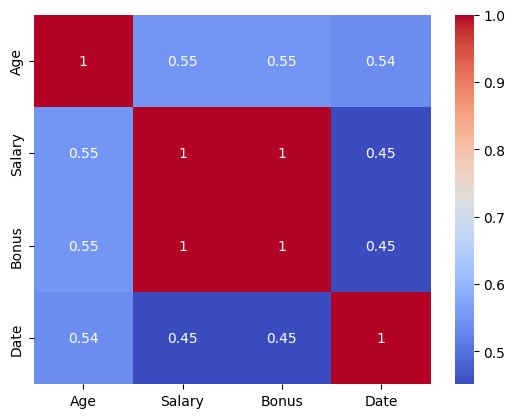

In [88]:
#Correlation HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(columns=["Name", "City", "Department"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()